In [369]:
############################################ Import Data ############################################

# library providing high-performance, easy-to-use data structures and data 
# analysis tools for the Python programming language
import pandas as pd


df = pd.read_excel('HW4data.xlsx')
df = df.drop(columns=['sequence_number','Purchase'])

print(df.shape)                                       # Print num of rows and columns

print(df.columns)
df.head()

                                          

(2000, 23)
Index(['US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e',
       'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t',
       'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res', 'Spending'],
      dtype='object')


,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Spending
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,2,3662,3662,1,0,1,127.87
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,2900,2900,1,1,0,0.00
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3883,3914,0,0,0,127.48
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,829,829,0,1,0,0.00
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,869,869,0,0,0,0.00


In [240]:
print(df.describe())

                US     source_a     source_c     source_b     source_d  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.824500     0.126500     0.056000     0.060000     0.041500   
std       0.380489     0.332495     0.229979     0.237546     0.199493   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          source_e    source_m     source_o     source_h     source_r  ...  \
count  2000.000000  2000.00000  2000.000000  2000.000000  2000.000000  ...   
mean      0.151000     0.01650     0.033500     0.052500     0.068500  ...   
std       0.358138     0.12742     0.179983     0.223089     0.252665  ...   
min       0.000000   

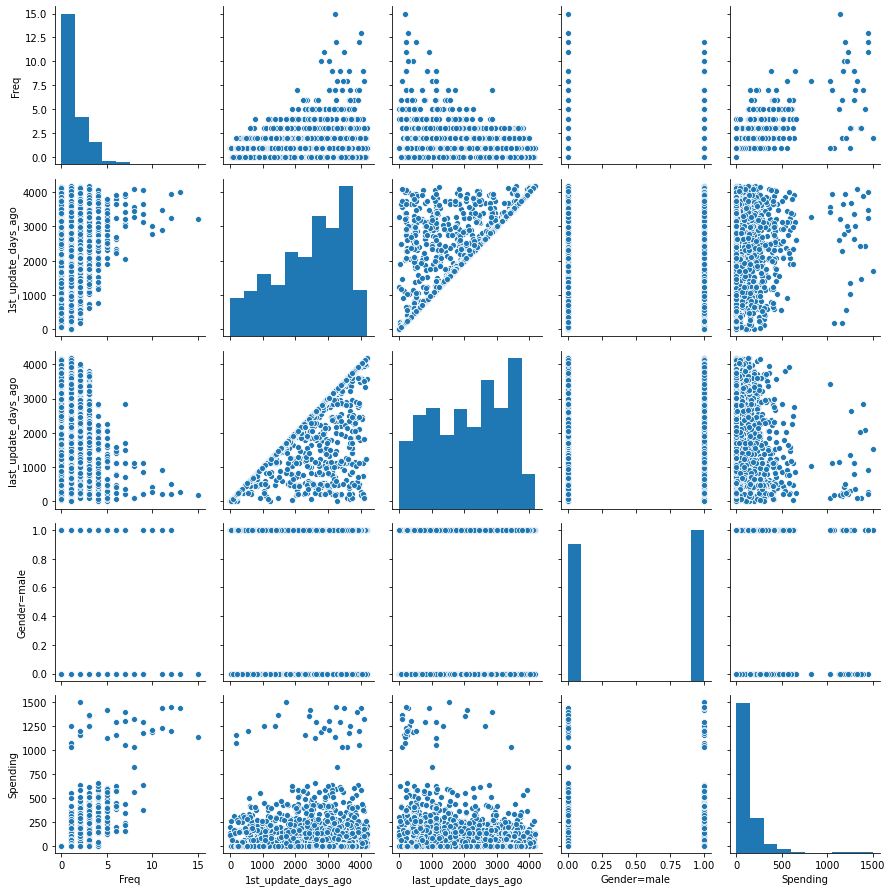

In [371]:
############################################ Data Visualization  ############################################

# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Freq', '1st_update_days_ago', 'last_update_days_ago', 'Gender=male', 'Spending'] # Select Attributes

sns.pairplot(df[cols], height=2.5)            # Plot pairwise relationships in a dataset
plt.tight_layout()                            # Tight_layout automatically adjusts subplot params 
                                              # so that the subplot(s) fits in to the figure area.
# plt.savefig('housing_dataset.png', dpi=300) # Saves the figure in our local disk
plt.show()                                    # Display figure


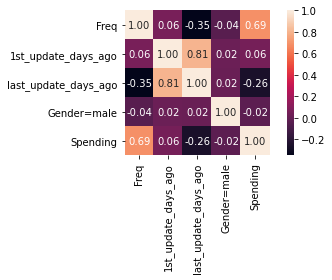

In [372]:
############################################ Correlations  ############################################

import numpy as np


cm = np.corrcoef(df[cols].values.T) # Return Pearson product-moment correlation coefficients

# sns.set(font_scale=1.5)
# Heatmap visualisation of pearson correlation coefficients
# Documentation https://seaborn.pydata.org/generated/seaborn.heatmap.html
hm = sns.heatmap(cm,                # Plot rectangular data as a color-encoded matrix
                 cbar=True,         # Whether to draw a colorbar.
                 annot=True,        # If True, write the data value in each cell.
                 square=True,       # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 fmt='.2f',         # String formatting code to use when adding annotations.
                 annot_kws={'size': 10}, # Keyword arguments for ax.text when annot is True
                 yticklabels=cols,  # If True, plot the column names of the dataframe.
                 xticklabels=cols)

plt.tight_layout()
plt.show()

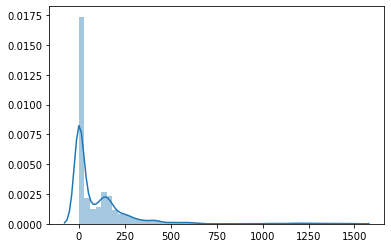

In [375]:
import seaborn as sns
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns

np.seterr(divide = 'ignore')

y = df[["Spending"]]
sns.distplot(y)

In [404]:
################################### Fit a Linear Regression Model  ###################################
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Split validation class
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold


X = df[['US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e',
       'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t',
       'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res']] 
y = df[['Spending']]     # Set last column as target variable

cv= KFold(n_splits = 10, shuffle = True, random_state=42)

slr = LinearRegression()    # Linear Regression class
slr = slr.fit(X, y)  

scores = cross_val_score(slr, X, y, cv=cv, scoring = 'neg_mean_squared_error') # cross-validation scores
rmse =np.sqrt(-1*scores)

print("RMSE: %0.2f (+/- %0.2f)" % (rmse.mean(), rmse.std() * 2))
print(rmse)

RMSE: 126.07 (+/- 41.37)
[119.2507739  138.715329   129.48134651 100.24333674 123.62679854
 120.51232766 160.24595487  85.9095993  133.9582009  148.72882715]


In [403]:
#################################### Regressor Tree - Numeric Prediction       ####################################
import numpy as np 
from sklearn.tree import DecisionTreeRegressor #Documentation available here http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.model_selection import cross_val_score

X = df[['US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e',
       'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t',
       'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order', 'Gender=male', 'Address_is_res']] 
y = df[['Spending']]

cv= KFold(n_splits = 10, shuffle = True, random_state=42)

tree = DecisionTreeRegressor(random_state=42)
tree = tree.fit(X, y)

scores = cross_val_score(tree, X, y, cv=cv,scoring = 'neg_mean_squared_error') # cross-validation scores
rmse = np.sqrt(-1*scores)
print("RMSE: %0.2f (+/- %0.2f)" % (rmse.mean(), rmse.std() * 2)) #estimate mean and variance from cross validation
print(rmse)


RMSE: 163.34 (+/- 61.28)
[216.51226127 142.1131128  138.08840038 148.19708131 150.47302522
 119.58825072 185.59890031 148.68358077 172.06985467 212.10075289]


In [402]:
##################################### kNN Regressor Example    #####################################
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import explained_variance_score, max_error
from math import sqrt

X = df[['US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e',
       'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t',
       'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res']] 
y = df[['Spending']]


#split dataset into train and test data
cv = KFold(n_splits= 10, shuffle = True,random_state=42)

#normalize data with min max scaling
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)


#3NN regressor
knn= neighbors.KNeighborsRegressor()

#Fit and Evaluate Model
knn = knn.fit(X, y)  #fit the model

scores = cross_val_score(knn, X, y, cv=cv,scoring = 'neg_mean_squared_error') # cross-validation scores
rmse = np.sqrt(-1*scores)
print("RMSE: %0.2f (+/- %0.2f)" % (rmse.mean(), rmse.std() * 2))
print(rmse)

RMSE: 168.51 (+/- 34.73)
[177.00183967 175.07032343 154.2500002  142.95300469 156.8382759
 185.74998591 171.05601062 142.56063974 186.5382422  193.11966469]


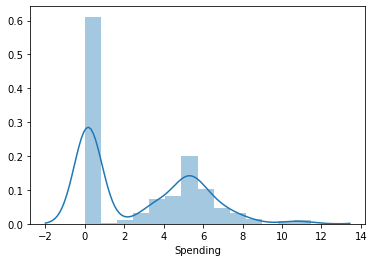

In [392]:
import seaborn as sns
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns

np.seterr(divide = 'ignore')

FS = np.sqrt(df['Freq'])
df['FS']= FS 
FC = np.cbrt(df['Freq'])
df['FC'] = FC 
FL = np.log(df['Freq'] + 1)
df['FL'] = FL

OS = np.sqrt(df['1st_update_days_ago'])
df['OS'] = OS
OC = np.cbrt(df['1st_update_days_ago'])
df['OC'] = OC 
OL = np.log(df['1st_update_days_ago']+1)
df['OL'] = OL

LS = np.sqrt (df['last_update_days_ago'])
df['LS'] = LS
LC = np.cbrt (df['last_update_days_ago'])
df['LC'] = LC
LL = np.log (df['last_update_days_ago']+1)
df['LL'] = LL

SS = np.sqrt(df['Spending'])
df['SS'] = SS
SC = np.cbrt(df['Spending'])
df['SC'] = SC
SL = np.log(df['Spending']+1)
df['SL'] = SL

time_elapsed = (df['last_update_days_ago'] - df['1st_update_days_ago'])
df['TE'] = time_elapsed 


sns.distplot(SC)

In [415]:
################################### Fit a Linear Regression Model  ###################################
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold



X = df[['US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e',
       'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t',
       'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'LC', 'OC', 'Web order',
       'Gender=male', 'Address_is_res']] # Use all features as attributes except last column
y = df[['SC']]      # Set last column as target variable

cv= KFold(n_splits = 10, shuffle = True, random_state=42)

slr2 = LinearRegression()    # Linear Regression class
slr2 = slr2.fit(X, y)  

scores = cross_val_score(slr2, X, y, cv=cv, scoring = 'neg_mean_squared_error') # cross-validation scores
rmse = np.sqrt(-1*((scores))**3)

print("RMSE: %0.3f (+/- %0.3f)" % (rmse.mean(), rmse.std() * 2))
print(rmse)


RMSE: 8.412 (+/- 2.281)
[7.25249854 9.44437094 9.69148992 7.70070941 7.87793753 8.60934996
 9.30668537 5.93462937 8.92800626 9.37547921]


In [416]:
#################################### Regressor Tree - Numeric Prediction       ####################################

from sklearn.tree import DecisionTreeRegressor #Documentation available here http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.model_selection import cross_val_score

X = df[['US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e',
       'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t',
       'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'LC', 'OC', 'Web order',
       'Gender=male', 'Address_is_res']] # Use all features as attributes except last column
y = df[['SC']]

# Decision Tree Regressor
# Supported criteria are “mse” for the mean squared error, which is equal to variance 
# reduction as feature selection criterion and minimizes the L2 loss using the mean of 
# each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s 
# improvement score for potential splits, and “mae” for the mean absolute error, 
# which minimizes the L1 loss using the median of each terminal node.
tree2 = DecisionTreeRegressor(random_state=42)
tree2.fit(X, y)

scores = cross_val_score(tree2, X, y, cv=cv, scoring = 'neg_mean_squared_error') # cross-validation scores
rmse = np.sqrt(-1*((scores))**3)

print("Performance: %0.2f (+/- %0.2f)" % (rmse.mean(), rmse.std() * 2))
print(rmse)




Performance: 16.37 (+/- 6.21)
[14.52615844 17.87362559 14.85942472 15.82975579 12.21280172 12.57510703
 20.91973372 14.3700947  21.16288786 19.3351003 ]


In [418]:
##################################### kNN Regressor Example    #####################################
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import explained_variance_score, max_error
from math import sqrt


X = df[['US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e',
       'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t',
       'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'LC', 'OC', 'Web order',
       'Gender=male', 'Address_is_res']] # Use all features as attributes except last column
y = df[['SC']]


#split dataset into train and test data
cv = KFold(n_splits= 10, shuffle = True)

#normalize data with min max scaling
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)


#3NN regressor
knn= neighbors.KNeighborsRegressor(n_neighbors = 3)

#Fit and Evaluate Model
knn = knn.fit(X_train, y_train)  #fit the model

scores = cross_val_score(knn, X, y, cv=cv,scoring = 'neg_mean_squared_error') # cross-validation scores
rmse = (np.sqrt(-1*scores))**3
print("RMSE: %0.2f (+/- %0.2f)" % (rmse.mean(), rmse.std() * 2))
print(rmse)

RMSE: 9.48 (+/- 3.44)
[ 8.97433965  6.38426001  9.78505881  9.40488171  7.68787314  9.57431389
  8.47011184 10.76970124 10.87113585 12.90383199]


In [427]:
#################################### LinReg - Nested CV      ####################################

# Find optimal paramater for DecisionTreeRegressor with GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

X = df[['US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e',
       'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t',
       'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'LC', 'OC', 'Web order',
       'Gender=male', 'Address_is_res']] # Use all features as attributes except last column
y = df[['SC']]


inner_cv = KFold(n_splits=5, shuffle=True)
outer_cv = KFold(n_splits=5, shuffle=True)

# Find the max_depth that minimizes MSE
# Inner CV
# JULIE: must specify cv=3 and iid = True
parameters = {'fit_intercept': [True,False], 'n_jobs': range(-1,30)}      # range of parameters for the depth of the tree
gs_ln = GridSearchCV(LinearRegression(), parameters, cv=inner_cv,scoring = 'neg_root_mean_squared_error', ) #GridSearchCV
gs_ln.fit(X, y) # Fit model

gs_ln = gs_ln.fit(X,y)
print(" Parameter Tuning")
print("Non-nested Performance: ", (-gs_ln.best_score_)**3)
print("Optimal Parameter: ", gs_ln.best_params_)    # Parameter setting that gave the best results on the hold out data.
print("Optimal Estimator: ", gs_ln.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
# Outer CV
nested_score_gln = -(cross_val_score(gs_ln, X=X, y=y, cv=outer_cv))**3
print("Nested CV Performance: ",nested_score_gln.mean(), " +/- ", nested_score_gln.std())

 Parameter Tuning
Non-nested Performance:  8.394740312028414
Optimal Parameter:  {'fit_intercept': False, 'n_jobs': -1}
Optimal Estimator:  LinearRegression(fit_intercept=False, n_jobs=-1)
Nested CV Performance:  8.384763256521632  +/-  0.5524733464323963


In [426]:
#################################### Regressor Tree - Nested CV      ####################################

# Find optimal paramater for DecisionTreeRegressor with GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor

X = df[['US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e',
       'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t',
       'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'LC', 'OC', 'Web order',
       'Gender=male', 'Address_is_res']] # Use all features as attributes except last column
y = df[['SC']]

inner_cv = KFold(n_splits=5, shuffle=True)
outer_cv = KFold(n_splits=5, shuffle=True)

# Find the max_depth that minimizes MSE
# Inner CV
# JULIE: must specify cv=3 and iid = True
parameters = {'max_depth':range(3,50), 'criterion': ['mse', 'friedman_mse', 'mae'], 'max_features' : [1,2,3,4,5,6,None], 
                               'min_impurity_decrease': [.1,.05,.001,.005,.0001,.0005]}      # range of parameters for the depth of the tree
gs_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), parameters, n_jobs=4, cv=inner_cv, scoring = 'neg_root_mean_squared_error') #GridSearchCV
gs_dt.fit(X, y) # Fit model

gs_dt = gs_dt.fit(X,y)
print(" Parameter Tuning")
print("Non-nested Performance: ", -(gs_dt.best_score_)**3)
print("Optimal Parameter: ", gs_dt.best_params_)    # Parameter setting that gave the best results on the hold out data.
print("Optimal Estimator: ", gs_dt.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
# Outer CV
nested_score_gs_dt = -(cross_val_score(gs_dt, X=X, y=y, cv=outer_cv))**3
print("Nested CV Performance: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())

 Parameter Tuning
Non-nested Performance:  7.362874595229703
Optimal Parameter:  {'criterion': 'mse', 'max_depth': 6, 'max_features': None, 'min_impurity_decrease': 0.0001}
Optimal Estimator:  DecisionTreeRegressor(max_depth=6, min_impurity_decrease=0.0001,
                      random_state=42)
Nested CV Performance:  7.968660825327116  +/-  0.6121401991832026


In [428]:
#################################### Regressor Tree - Nested CV      ####################################

# Find optimal paramater for DecisionTreeRegressor with GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor

inner_cv = KFold(n_splits=5, shuffle=True)
outer_cv = KFold(n_splits=5, shuffle=True)

X = df[['US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e',
       'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t',
       'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'LC', 'OC', 'Web order',
       'Gender=male', 'Address_is_res']] # Use all features as attributes except last column
y = df[['SC']]

# Find the max_depth that minimizes MSE
# Inner CV
# JULIE: must specify cv=3 and iid = True
parameters = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31],
                               'weights':['uniform','distance'],
                                'p': [1,2], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}     # range of parameters for the depth of the tree
gs_knn = GridSearchCV(KNeighborsRegressor(), parameters, n_jobs=4, cv=inner_cv, scoring = 'neg_root_mean_squared_error') #GridSearchCV
gs_knn.fit(X, y) # Fit model

gs_knn = gs_knn.fit(X,y)
print(" Parameter Tuning")
print("Non-nested Performance: ", -(gs_knn.best_score_)**3)
print("Optimal Parameter: ", gs_knn.best_params_)    # Parameter setting that gave the best results on the hold out data.
print("Optimal Estimator: ", gs_knn.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
# Outer CV
nested_score_gs_knn = -(cross_val_score(gs_knn, X=X, y=y, cv=outer_cv))**3
print("Nested CV Performance: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())

 Parameter Tuning
Non-nested Performance:  7.7722008847253905
Optimal Parameter:  {'algorithm': 'brute', 'n_neighbors': 13, 'p': 2, 'weights': 'uniform'}
Optimal Estimator:  KNeighborsRegressor(algorithm='brute', n_neighbors=13)
Nested CV Performance:  7.759795481294349  +/-  0.9878899371001633
